In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))
from data_loader import load_data

plt.style.use('default')
sns.set_palette('husl')

c:\Users\Ozbert\Desktop\ds360\loan_risk_analysis\.mvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = load_data()
print(f"Dataset shape: {df.shape}")
df.head()

Yerel veri yüklendi!
Dataset shape: (500, 11)


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
print("Veri Tipleri:")
print(df.dtypes)
print("\nEksik Değerler:")
print(df.isnull().sum())
print("\nTemel İstatistikler:")
df.describe()

Veri Tipleri:
Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

Eksik Değerler:
Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

Temel İstatistikler:


,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


target değişken analizi

Target column: loan_status
loan_status
PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: count, dtype: int64


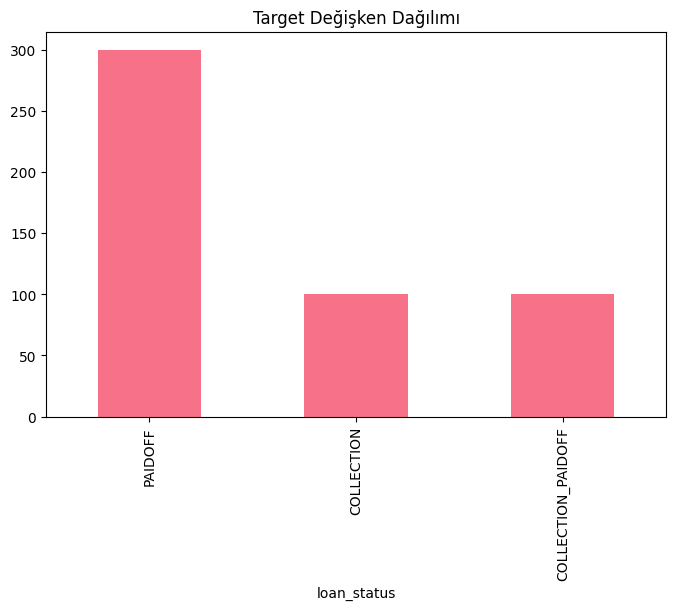

In [5]:
# Target değişken dağılımı (loan verisinde genelde 'default', 'loan_status' gibi)
target_cols = [col for col in df.columns if any(word in col.lower() for word in ['default', 'status', 'target', 'class'])]
if target_cols:
    target_col = target_cols[0]
    print(f"Target column: {target_col}")
    print(df[target_col].value_counts())
    
    plt.figure(figsize=(8, 5))
    df[target_col].value_counts().plot(kind='bar')
    plt.title('Target Değişken Dağılımı')
    plt.show()
else:
    print("Target column bulunamadı. Tüm kolonları listeleyelim:")
    print(df.columns.tolist())

Sayısal kolonlar: ['Principal', 'terms', 'past_due_days', 'age']


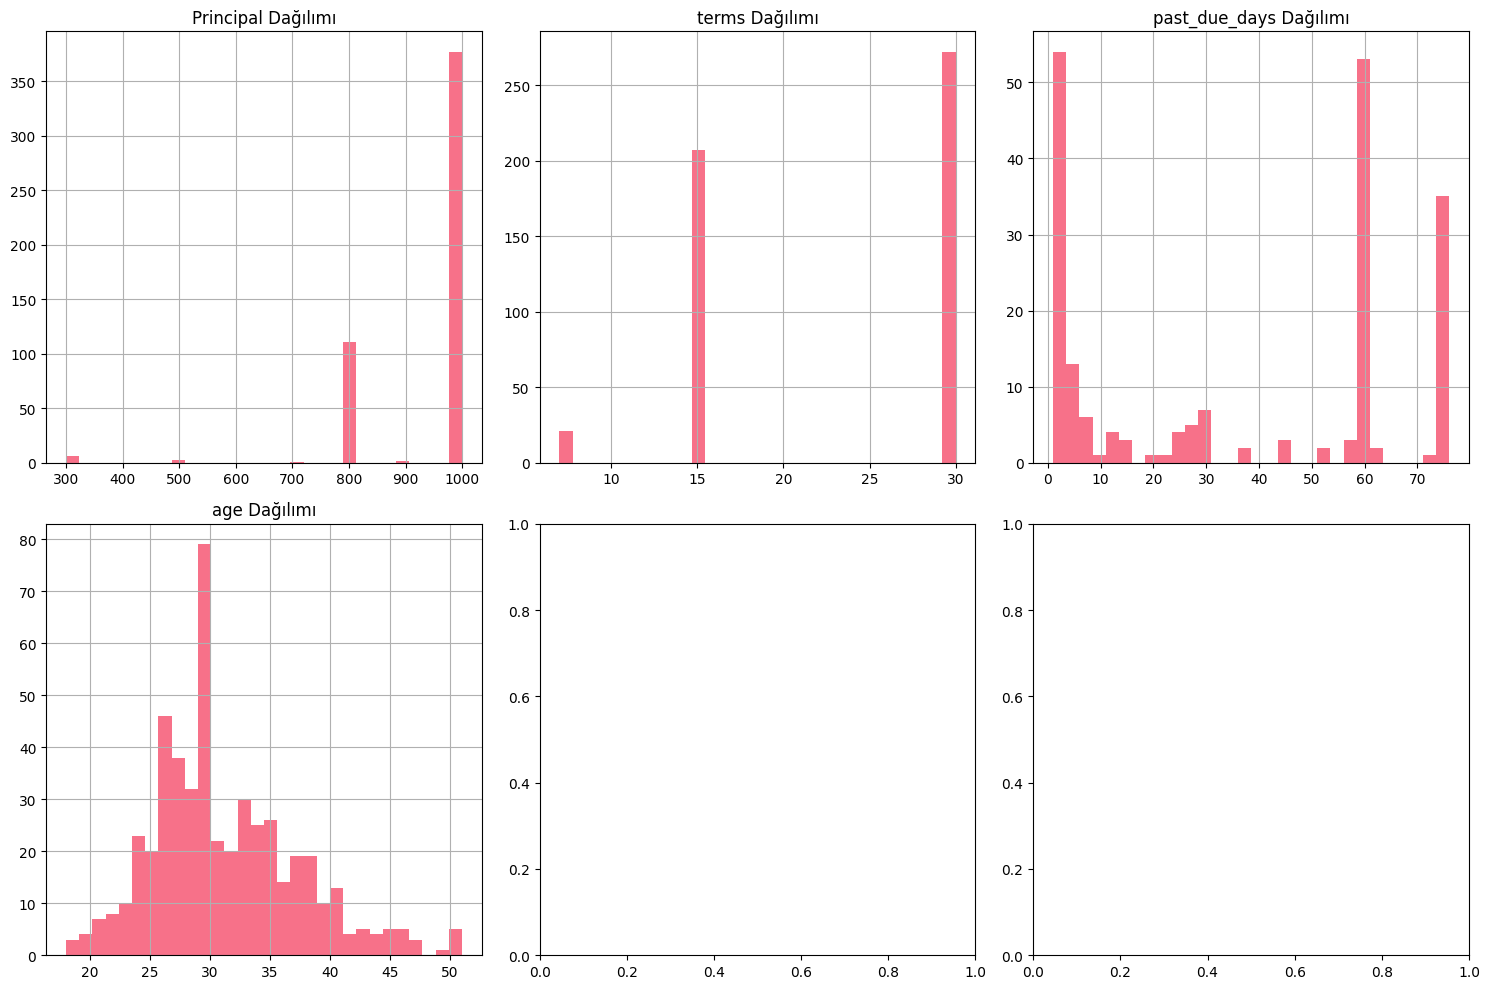

In [6]:
# Sayısal kolonları bul
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Sayısal kolonlar: {numeric_cols}")

# Dağılımları görselleştir
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(numeric_cols[:6]):
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'{col} Dağılımı')
    
    plt.tight_layout()
    plt.show()

Kategorik kolonlar: ['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'education', 'Gender']

Loan_ID dağılımı:
Loan_ID
xqd20166231    1
xqd20160330    1
xqd20160343    1
xqd20160342    1
xqd20160341    1
              ..
xqd20160162    1
xqd20160161    1
xqd20160160    1
xqd12160159    1
xqd20160500    1
Name: count, Length: 500, dtype: int64


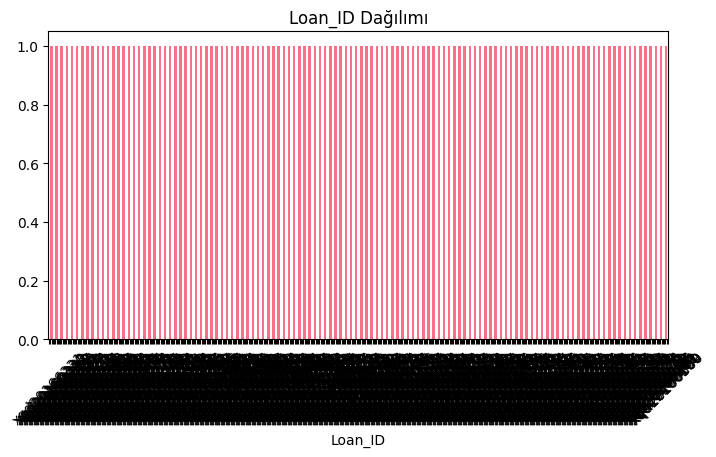


loan_status dağılımı:
loan_status
PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: count, dtype: int64


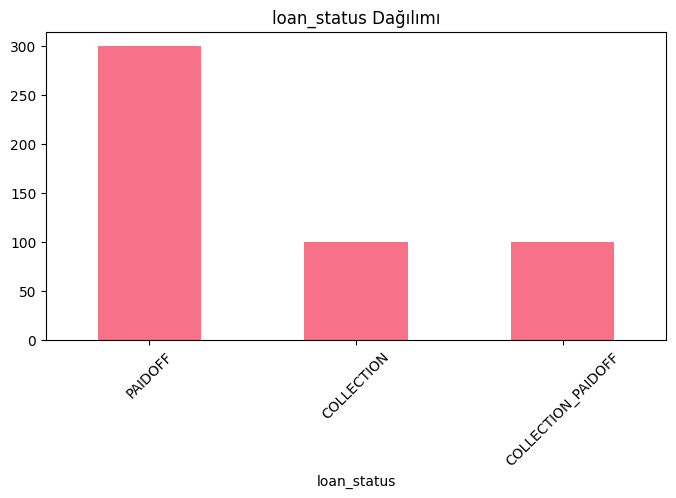


effective_date dağılımı:
effective_date
9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: count, dtype: int64


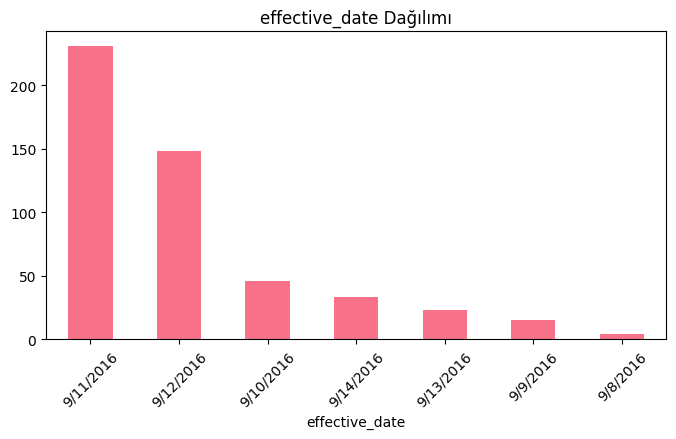


due_date dağılımı:
due_date
10/10/2016    123
9/25/2016      87
10/11/2016     69
9/26/2016      60
10/9/2016      28
10/13/2016     21
9/24/2016      17
9/27/2016      12
9/28/2016      10
11/10/2016     10
11/9/2016       9
10/12/2016      8
9/17/2016       7
10/8/2016       7
9/23/2016       6
10/25/2016      4
10/26/2016      4
9/18/2016       4
10/7/2016       3
9/19/2016       3
9/16/2016       3
11/12/2016      2
9/22/2016       1
9/15/2016       1
11/7/2016       1
Name: count, dtype: int64


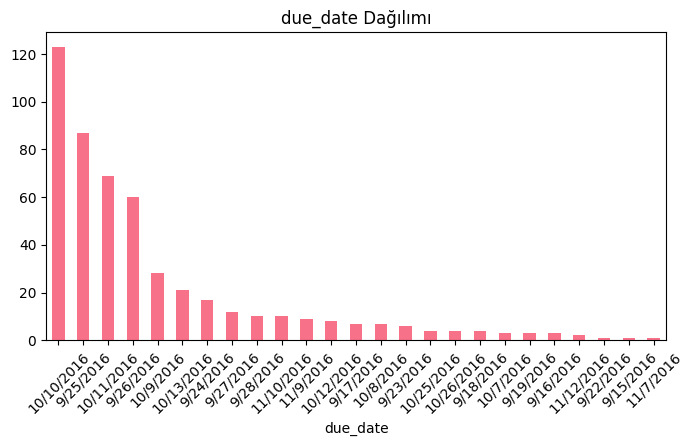

In [7]:
# Kategorik kolonları bul
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kategorik kolonlar: {categorical_cols}")

# Her kategorik değişken için dağılım
for col in categorical_cols[:4]:  # İlk 4 kategorik değişken
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

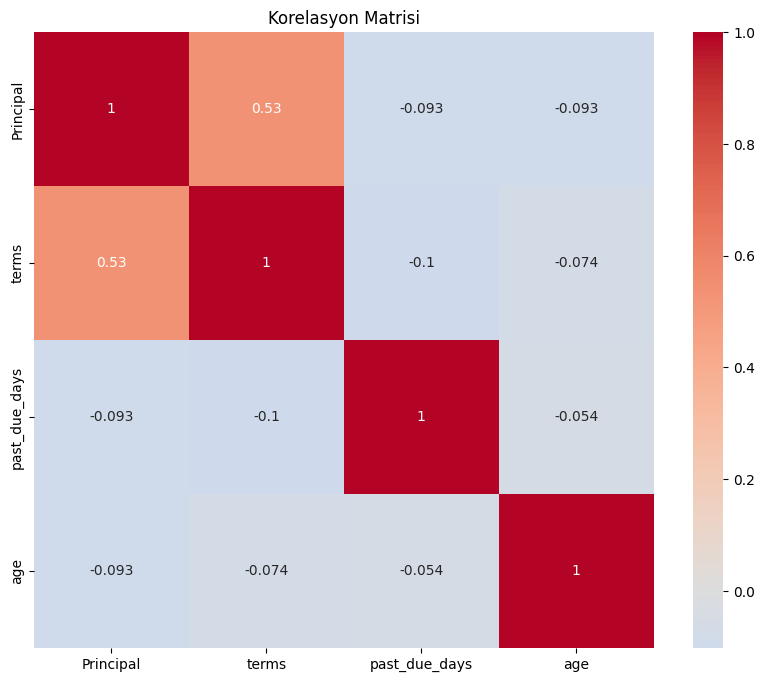

In [8]:
# Sayısal değişkenler arası korelasyon
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Korelasyon Matrisi')
    plt.show()

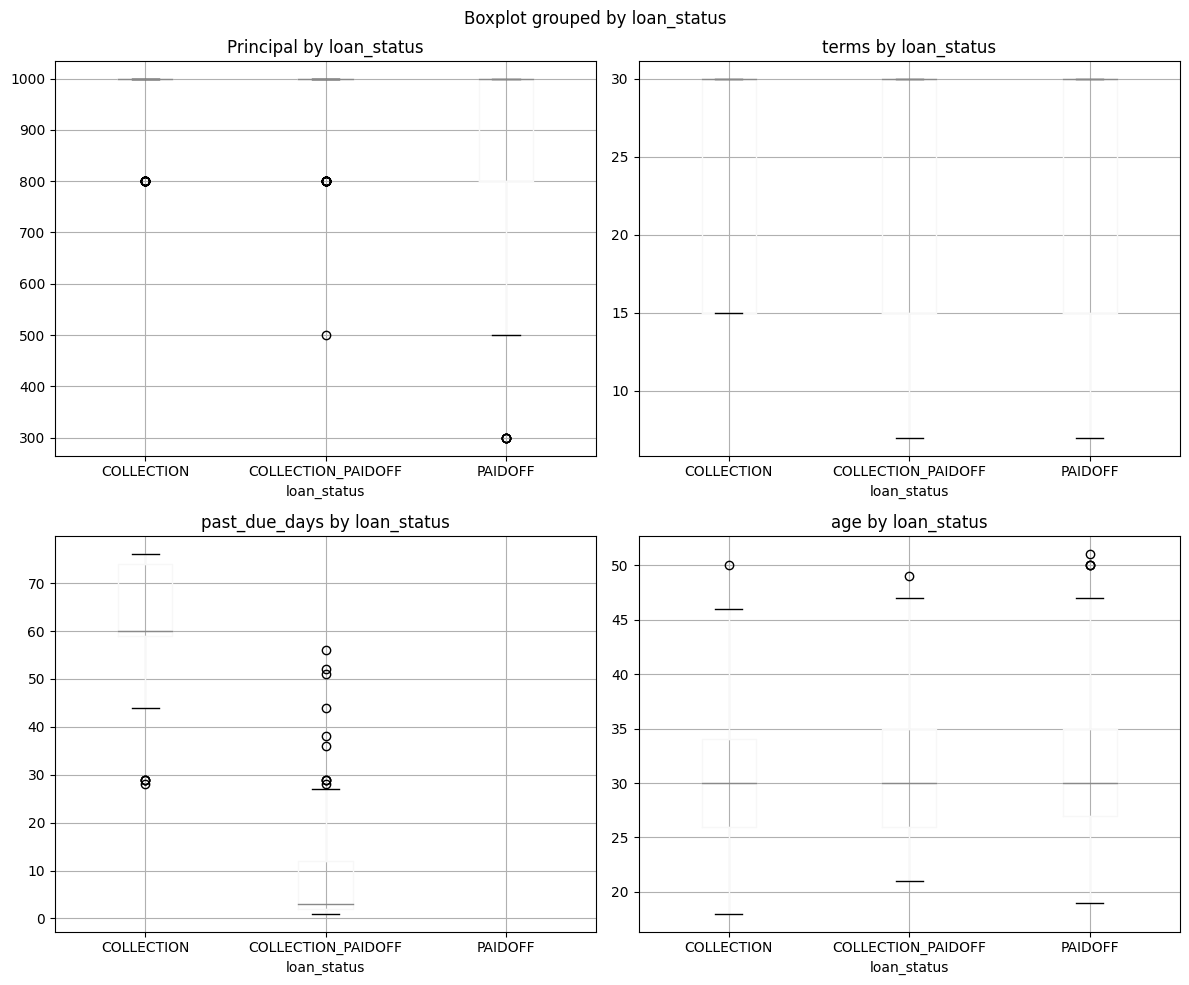

In [9]:
# Target değişken ile diğer değişkenler arası ilişki
if 'target_col' in locals() and len(numeric_cols) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()
    
    numeric_features = [col for col in numeric_cols if col != target_col][:4]
    
    for i, col in enumerate(numeric_features):
        df.boxplot(column=col, by=target_col, ax=axes[i])
        axes[i].set_title(f'{col} by {target_col}')
    
    plt.tight_layout()
    plt.show()

In [10]:
print("Veri Kalitesi Raporu:")
print(f"Toplam satır sayısı: {len(df)}")
print(f"Toplam kolon sayısı: {len(df.columns)}")
print(f"Eksik değer oranı: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")
print(f"Duplicate satır sayısı: {df.duplicated().sum()}")

# Aykırı değer kontrolü (basit IQR yöntemi)
print("\nAykırı Değer Analizi (IQR):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} aykırı değer ({len(outliers)/len(df)*100:.1f}%)")

Veri Kalitesi Raporu:
Toplam satır sayısı: 500
Toplam kolon sayısı: 11
Eksik değer oranı: 7.27%
Duplicate satır sayısı: 0

Aykırı Değer Analizi (IQR):
Principal: 123 aykırı değer (24.6%)
terms: 0 aykırı değer (0.0%)
past_due_days: 0 aykırı değer (0.0%)
age: 6 aykırı değer (1.2%)
